<a href="https://colab.research.google.com/github/Arjunposni/AIML_Project/blob/main/team8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("/content/drive/MyDrive/sales_transactions_regression.csv")
print("the basic info are:")
print(df.info())

the basic info are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  249 non-null    object 
 1   region          245 non-null    object 
 2   product_id      239 non-null    float64
 3   product_id.1    239 non-null    float64
 4   sales_amount    249 non-null    float64
 5   date            248 non-null    object 
 6   units_sold      241 non-null    float64
 7   unit_price      239 non-null    float64
 8   discount_pct    244 non-null    float64
 9   store_id        249 non-null    object 
 10  product_id.2    239 non-null    float64
 11  product_id.3    239 non-null    float64
dtypes: float64(8), object(4)
memory usage: 24.5+ KB
None


In [7]:
cols=["store_id","product_id.2","product_id.3"]
data=df[cols].copy()

In [8]:
data["store_id"].fillna(data["store_id"].mode()[0],inplace=True)
data["product_id.2"].fillna(data["product_id.2"].median(),inplace=True)
data["product_id.3"].fillna(data["product_id.3"].median(),inplace=True)

/tmp/ipython-input-4220267342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["store_id"].fillna(data["store_id"].mode()[0],inplace=True)
/tmp/ipython-input-4220267342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      260 non-null    object 
 1   product_id.2  260 non-null    float64
 2   product_id.3  260 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB
None


In [14]:
print("unique values in store_id are:")
print(data["store_id"].nunique())
print("unoique values in product_id.2 are:")
print(data["product_id.2"].nunique())
print("unique values in product_id.3 are:")
print(data["product_id.3"].nunique())

unique values in store_id are:
9
unoique values in product_id.2 are:
172
unique values in product_id.3 are:
172


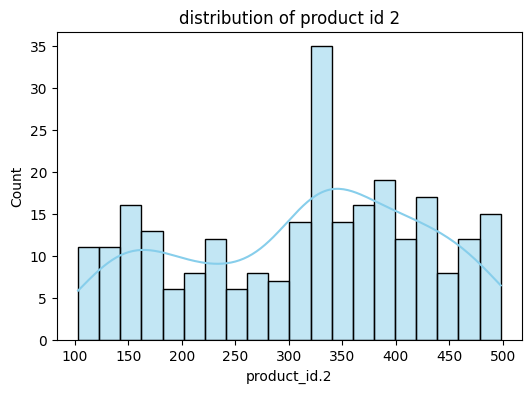

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data['product_id.2'],bins=20,kde=True,color='skyblue')
plt.title("distribution of product id 2")
plt.show()

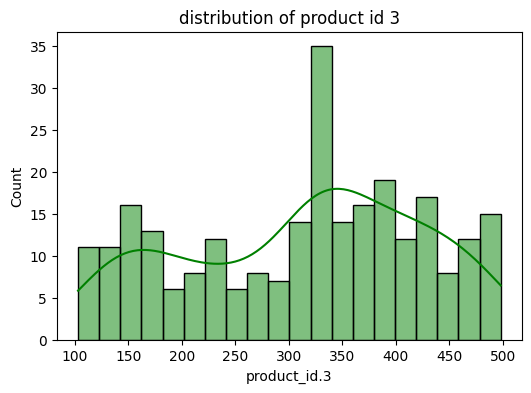

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(data['product_id.3'],bins=20,kde=True,color='green')
plt.title("distribution of product id 3")
plt.show()

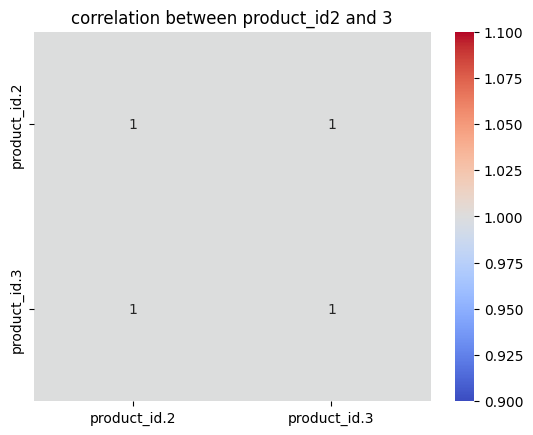

In [13]:
corr=data[['product_id.2','product_id.3']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation between product_id2 and 3")
plt.show()

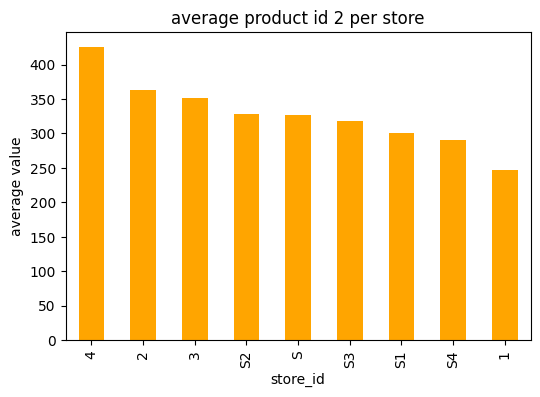

In [15]:
store_products=data.groupby("store_id")["product_id.2"].mean().sort_values(ascending=False)
store_products.plot(kind='bar',color="orange",figsize=(6,4))
plt.title("average product id 2 per store")
plt.ylabel("average value")
plt.show()

## - the graph shows that store 4 has the highest no of different types of product and next followed by stores 2,3,and s2 and the least no of different types of product are in store 1
## now this also tells us that store 4 might have the highest sale